In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [2]:
# loading the csv data to a Pandas DataFrame
ev= pd.read_csv('C:\\Users\\Himani\\Desktop\\pp/big.csv')

In [3]:
# checking the number of missing values
ev.isnull().sum()

id                          0
clusterId                   0
connectionTime              0
Num.Rep.                    0
disconnectTime              0
donechargingTime            1
SessionLength               0
Avg.Sess.                   0
kWhDelivered                0
Avg.Cons.                   0
sessionId                   0
siteId                      0
spaceID                     0
stationID                   0
timezone                    0
userID                   1199
userInput                1199
Precip Type                 0
temperature                 0
Avg. Humidity               0
Avg Wind Speed(mph)         0
Wind Bearing(degrees)       0
Visibility(km)              0
Loud Cover                  0
Pressure(millibar)          0
dtype: int64

In [4]:
ev["donechargingTime"] = ev["donechargingTime"].fillna(ev["donechargingTime"].mode()[0])

In [5]:
NAs = pd.concat([ev.isnull().sum()], axis=1, keys=["EV"])
NAs[NAs.sum(axis=1) > 0]

,EV
userID,1199
userInput,1199


In [6]:
ev.pop("userID")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userID, Length: 1199, dtype: float64

In [7]:
ev.pop("userInput")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1194   NaN
1195   NaN
1196   NaN
1197   NaN
1198   NaN
Name: userInput, Length: 1199, dtype: float64

In [8]:
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_18000\576543398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num.Rep.,NaN,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,NaN,-0.005883,0.000890,0.082359,-0.102735,-0.177679,NaN,-0.118644
SessionLength,NaN,-0.071010,1.000000,0.380336,0.349359,0.288598,NaN,-0.315319,-0.303165,-0.081812,0.114141,0.003940,NaN,0.259002
Avg.Sess.,NaN,-0.107489,0.380336,1.000000,0.227223,0.773066,NaN,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,NaN,0.485590
kWhDelivered,NaN,-0.130661,0.349359,0.227223,1.000000,0.231452,NaN,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,NaN,0.249317
Avg.Cons.,NaN,-0.040154,0.288598,0.773066,0.231452,1.000000,NaN,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,NaN,0.415482
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,NaN,1.000000,0.850414,0.100510,-0.046195,0.259534,NaN,-0.574374
Avg. Humidity,NaN,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,NaN,0.850414,1.000000,0.396623,-0.181635,0.109862,NaN,-0.507359
Avg Wind Speed(mph),NaN,0.082359,-0.081812,-0.266609,-0.025725,-0.548857,NaN,0.100510,0.396623,1.000000,-0.256970,-0.121604,NaN,-0.133499


In [9]:
ev.describe()

,clusterId,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
count,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.0,1199.000000
mean,39.0,14.840467,3.546372,2.895396,6.443036,5.465263,2.0,30.840901,39.845421,12.729166,188.645538,14.790342,0.0,1007.787873
std,0.0,4.004081,2.867130,0.223573,4.871629,0.605820,0.0,3.311170,3.334805,1.836852,98.281920,2.129531,0.0,3.449437
min,39.0,0.040000,0.010000,2.410000,0.000000,3.620000,2.0,24.370000,33.840000,10.240000,10.000000,9.900000,0.0,1003.100000
25%,39.0,12.000000,2.130000,2.750000,3.700000,4.920000,2.0,28.510000,37.565000,11.040000,120.000000,14.170000,0.0,1005.180000
50%,39.0,16.000000,3.010000,2.830000,5.790000,5.590000,2.0,31.660000,39.380000,12.490000,195.000000,15.730000,0.0,1006.920000
75%,39.0,17.000000,3.965000,2.930000,6.975000,5.810000,2.0,33.550000,42.950000,14.780000,271.000000,16.100000,0.0,1008.450000
max,39.0,23.900000,55.240000,3.550000,47.810000,6.450000,2.0,35.980000,45.100000,15.640000,339.000000,17.300000,0.0,1016.850000


In [10]:
ev.corr()

C:\Users\Himani\AppData\Local\Temp\ipykernel_18000\576543398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ev.corr()


,clusterId,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,siteId,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Loud Cover,Pressure(millibar)
clusterId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Num.Rep.,NaN,1.000000,-0.071010,-0.107489,-0.130661,-0.040154,NaN,-0.005883,0.000890,0.082359,-0.102735,-0.177679,NaN,-0.118644
SessionLength,NaN,-0.071010,1.000000,0.380336,0.349359,0.288598,NaN,-0.315319,-0.303165,-0.081812,0.114141,0.003940,NaN,0.259002
Avg.Sess.,NaN,-0.107489,0.380336,1.000000,0.227223,0.773066,NaN,-0.835803,-0.863568,-0.266609,0.276224,-0.143602,NaN,0.485590
kWhDelivered,NaN,-0.130661,0.349359,0.227223,1.000000,0.231452,NaN,-0.262378,-0.233600,-0.025725,-0.099936,0.078063,NaN,0.249317
Avg.Cons.,NaN,-0.040154,0.288598,0.773066,0.231452,1.000000,NaN,-0.698765,-0.849067,-0.548857,0.087399,-0.116635,NaN,0.415482
siteId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature,NaN,-0.005883,-0.315319,-0.835803,-0.262378,-0.698765,NaN,1.000000,0.850414,0.100510,-0.046195,0.259534,NaN,-0.574374
Avg. Humidity,NaN,0.000890,-0.303165,-0.863568,-0.233600,-0.849067,NaN,0.850414,1.000000,0.396623,-0.181635,0.109862,NaN,-0.507359
Avg Wind Speed(mph),NaN,0.082359,-0.081812,-0.266609,-0.025725,-0.548857,NaN,0.100510,0.396623,1.000000,-0.256970,-0.121604,NaN,-0.133499


C:\Users\Himani\AppData\Local\Temp\ipykernel_18000\3648164053.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ev['kWhDelivered'],color='pink')


<Axes: xlabel='kWhDelivered', ylabel='Density'>

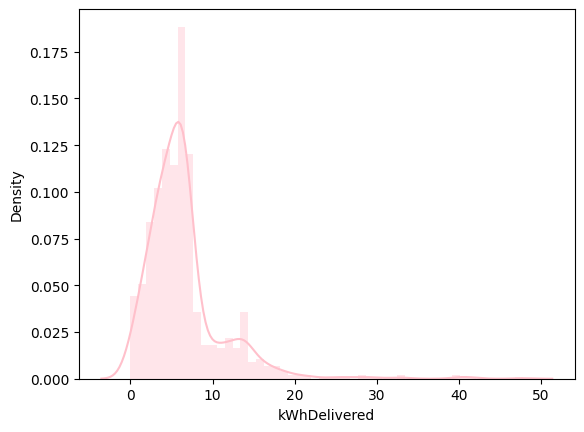

In [11]:
sns.distplot(ev['kWhDelivered'],color='pink')

In [12]:
correlation = ev.corr()
print(correlation['kWhDelivered'])

clusterId                     NaN
Num.Rep.                -0.130661
SessionLength            0.349359
Avg.Sess.                0.227223
kWhDelivered             1.000000
Avg.Cons.                0.231452
siteId                        NaN
temperature             -0.262378
Avg. Humidity           -0.233600
Avg Wind Speed(mph)     -0.025725
Wind Bearing(degrees)   -0.099936
Visibility(km)           0.078063
Loud Cover                    NaN
Pressure(millibar)       0.249317
Name: kWhDelivered, dtype: float64


C:\Users\Himani\AppData\Local\Temp\ipykernel_18000\970396222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ev.corr()


In [13]:
ev.drop(['id','clusterId','connectionTime','sessionId','spaceID','stationID','disconnectTime','siteId','donechargingTime','timezone','Precip Type','Loud Cover'],axis=1,inplace=True)

In [14]:
ev

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar)
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55
...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18


<Axes: >

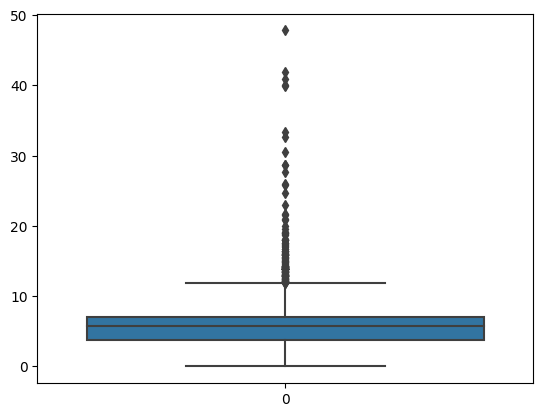

In [15]:
#Boxplot
sns.boxplot(ev['kWhDelivered'])

In [16]:
model=IsolationForest(n_estimators=500,max_samples='auto',contamination=0.04,max_features=1.0)
model.fit(ev[['kWhDelivered']])

C:\Users\Himani\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.04, n_estimators=500)

In [17]:
ev['newkWh']=model.decision_function(ev[['kWhDelivered']])
ev['anomaly']=model.predict(ev[['kWhDelivered']])
ev.head(10)

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newkWh,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.136464,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.078767,1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.182090,1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.180543,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.079217,1
5,14.73,10.56,3.54,7.91,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.139012,1
6,14.80,3.67,3.54,15.29,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.033658,1
7,14.97,4.13,3.53,6.95,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.210382,1
8,15.18,3.08,3.53,2.17,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.132023,1
9,15.20,3.29,3.52,2.44,6.43,24.37,34.85,13.54,300,9.9,1004.55,0.139281,1


In [18]:
outliers_counter = len(ev[ev['anomaly'] == -1])
outliers_counter   

48

In [19]:
ev_data = ev[(ev['kWhDelivered'] <=17)]

In [20]:
ev_data

,Num.Rep.,SessionLength,Avg.Sess.,kWhDelivered,Avg.Cons.,temperature,Avg. Humidity,Avg Wind Speed(mph),Wind Bearing(degrees),Visibility(km),Pressure(millibar),newkWh,anomaly
0,11.13,2.20,3.55,7.93,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.136464,1
1,13.75,11.19,3.55,10.01,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.078767,1
2,13.76,10.33,3.54,5.26,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.182090,1
3,14.62,9.31,3.55,5.18,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.180543,1
4,14.68,8.38,3.55,10.12,6.44,24.37,34.85,13.54,300,9.9,1004.55,0.079217,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1194,16.00,3.22,2.57,1.82,3.62,35.98,40.55,10.35,305,16.1,1005.18,0.117263,1
1195,19.00,1.51,2.41,4.73,4.07,35.98,40.55,10.35,305,16.1,1005.18,0.181264,1
1196,12.00,3.28,2.70,3.69,3.85,35.98,40.55,10.35,305,17.3,1005.18,0.176175,1
1197,13.00,1.89,2.42,3.82,3.93,35.98,40.55,10.35,305,17.3,1005.18,0.179620,1


#Splitting the features and target 

In [21]:
X = ev_data.drop(['kWhDelivered','newkWh','anomaly'],axis=1)
Y = ev_data['kWhDelivered']

In [22]:
scaler = StandardScaler()

In [23]:
scaler.fit(X)

StandardScaler()

In [24]:
standardized_data = scaler.transform(X)

In [25]:
print(standardized_data)

[[-0.93548255 -0.44890018  2.98515362 ...  1.13448072 -2.30320807
  -0.93252635]
 [-0.27630606  2.80337287  2.98515362 ...  1.13448072 -2.30320807
  -0.93252635]
 [-0.27379012  2.49225442  2.93994638 ...  1.13448072 -2.30320807
  -0.93252635]
 ...
 [-0.7165957  -0.0581933  -0.85746171 ...  1.18542102  1.18017525
  -0.74558311]
 [-0.46500162 -0.56104753 -2.1232644  ...  1.18542102  1.18017525
  -0.74558311]
 [-0.7165957  -0.17757596  0.27271927 ...  1.18542102  1.18017525
  -0.74558311]]


In [26]:
X = standardized_data
Y = ev_data['kWhDelivered']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [30]:
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[5.33690e+00 5.64630e+00 7.43390e+00 6.04430e+00 5.19430e+00 1.08438e+01
 7.33980e+00 4.33300e+00 5.08460e+00 5.39350e+00 3.03150e+00 5.76320e+00
 4.60530e+00 3.52710e+00 7.40350e+00 5.37060e+00 1.05936e+01 3.92950e+00
 6.58080e+00 5.74750e+00 3.23540e+00 6.36450e+00 4.23950e+00 9.08890e+00
 9.77140e+00 5.40100e+00 6.68660e+00 1.08360e+01 7.48030e+00 6.87690e+00
 2.07600e+00 1.03639e+01 5.69010e+00 1.10714e+01 6.25580e+00 4.52640e+00
 3.23050e+00 6.21440e+00 3.40860e+00 5.67350e+00 5.81130e+00 6.08490e+00
 7.93660e+00 5.31160e+00 3.93680e+00 1.07857e+01 4.61000e+00 4.11720e+00
 5.58860e+00 4.20010e+00 5.88760e+00 1.97580e+00 3.60500e+00 4.37640e+00
 7.38890e+00 4.69370e+00 4.11570e+00 5.60380e+00 5.21410e+00 6.18460e+00
 4.21880e+00 7.43240e+00 2.37940e+00 7.36280e+00 5.42450e+00 4.18400e+00
 5.90700e+00 3.18940e+00 6.63730e+00 4.29570e+00 3.66960e+00 7.10920e+00
 6.95070e+00 3.64820e+00 6.79160e+00 1.12891e+01 6.06020e+00 4.09020e+00
 5.90080e+00 1.35956e+01 4.88180e+00 5.89910e+00 4.

In [32]:
Y_test = list(Y_test)

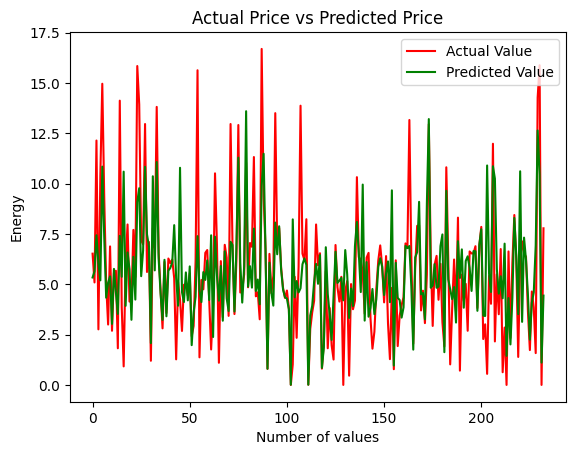

In [33]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [62]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    n = len(actual)
    ape = np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) / 2)
    smape = (1 / n) * np.sum(2 * ape) * 100
    return smape


In [63]:
#Training Scores
training_data_prediction = regressor.predict(X_train)

In [64]:
mean_absolute_error(Y_train, training_data_prediction)

0.6817325456498391

In [65]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.0363615297282853

In [66]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9098757018944632


In [67]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  31.431847023411326


In [52]:
#Test Scores
mean_absolute_error(Y_test, test_data_prediction)

1.6408326180257513

In [53]:
rms = sqrt(mean_squared_error(Y_test, test_data_prediction))

In [54]:
print(rms)

2.539775717886794


In [55]:
test_d_prediction = regressor.predict(X_train)

In [57]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.41712248187803


In [113]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))


In [114]:
smape_score = smape(Y_test, test_data_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  33.30298863789564


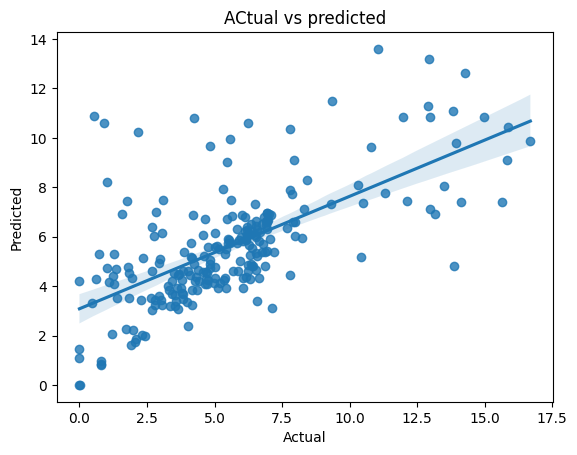

In [70]:
#Visualising
sns.regplot(x=Y_test, y=test_data_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()


#SVM

In [71]:
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
svr.fit(X_train,Y_train)

SVR(C=10, gamma=0.1)

In [72]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)

In [73]:
print(y_pred)

[ 5.34008223  5.36762583  5.30673305  6.9128541   5.59447047 12.90648189
  6.63729785  5.20705986  6.26472979  4.99171275  2.69828995  6.58746717
  4.37782698  3.6628192   7.44817132  5.58684539  6.9200077   4.09160506
  6.87898964  5.1402009   5.02354919  6.87645447  5.30841818 10.14825053
 12.27243807  6.46111136  6.20870333  9.88746897  7.02560729  7.58498304
  0.92433353  9.94114252  4.60370882 10.69799776  6.5471574   4.69592207
  3.57252841  6.14539085  3.83031837  4.65709653  6.07136749  6.84633272
  7.21573111  5.55464577  5.49997643  8.33832906  4.33609082  4.6953582
  4.97818777  3.78622084  5.91130749  3.2189922   3.42030239  6.27637233
  5.62195895  5.87924125  3.66461656  5.20788877  4.9166976   6.33263761
  4.55004756  8.75339607  2.21738368  5.4251699   4.67724773  5.4178897
  6.13381415  3.81295112  6.80399998  6.13195503  4.08753103  6.13233332
  7.04646734  2.40612772  6.27767948  8.13314469  7.12958676  4.76987653
  7.82006232  8.21088294  6.1090975   4.90113154  4.8

In [74]:
Y_test = list(Y_test)

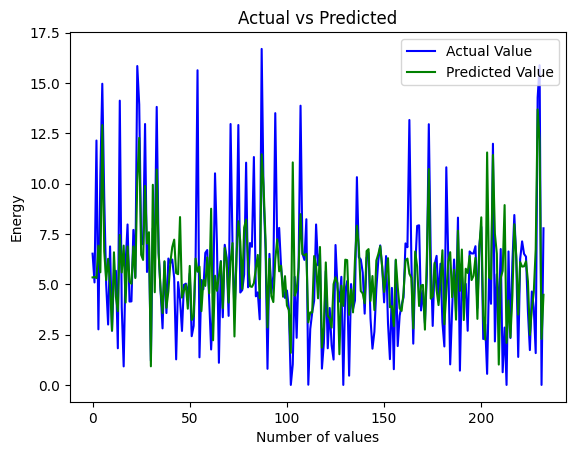

In [75]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [76]:
mean_absolute_error(Y_test, y_pred)

1.743207874118123

In [77]:
rms = sqrt(mean_squared_error(Y_test, y_pred))

In [78]:
print(rms)

2.6205176982196074


In [79]:
# R squared error
error_score = metrics.r2_score(Y_test, y_pred)
print("R squared error : ", error_score)

R squared error :  0.3794728820290726


In [80]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score: ", smape_score)

SMAPE score:  37.230506690275384


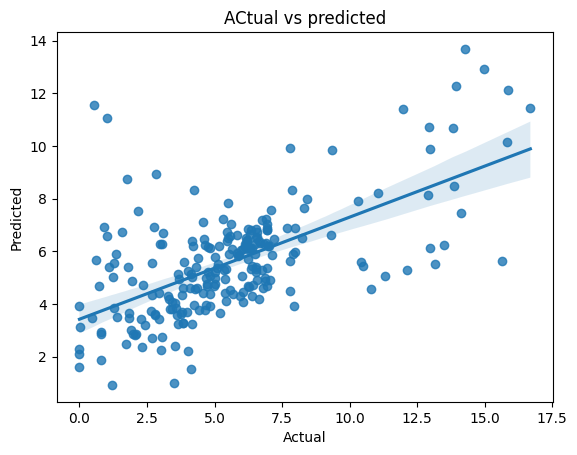

In [81]:
#Visualising
sns.regplot(x=Y_test, y=y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#XGB

In [82]:
# loading the model
xb_model = XGBRegressor()

In [83]:
# training the model with X_train
xb_model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [84]:
test_prediction = xb_model.predict(X_test)

In [85]:
print(test_prediction)

[ 6.8879218e+00  5.9833875e+00  7.4873261e+00  6.6291895e+00
  4.6567745e+00  1.0372294e+01  7.5617127e+00  4.1117935e+00
  3.1746814e+00  5.5946360e+00  2.9661860e+00  6.1332850e+00
  4.8321543e+00  3.1060739e+00  3.4057190e+00  5.3156056e+00
  8.1845961e+00  3.1807201e+00  6.0818982e+00  5.8586993e+00
  3.3463342e+00  6.1338339e+00  4.4037786e+00  1.1966398e+01
  8.9455214e+00  6.8603220e+00  6.3810196e+00  1.0289681e+01
  7.3104324e+00  6.8355365e+00  2.2750690e+00  1.1238104e+01
  5.7171330e+00  1.1647989e+01  6.3332872e+00  3.4723017e+00
  2.2145684e+00  5.7431521e+00  3.2479393e+00  5.6515365e+00
  5.5245008e+00  5.8288789e+00  8.3775272e+00  4.5982947e+00
  3.5407221e+00  1.0461502e+01  5.0271330e+00  3.8476925e+00
  5.5418358e+00  4.4383268e+00  5.1127257e+00  8.6138469e-01
  3.2682900e+00  6.0651784e+00  7.7501340e+00  6.2420053e+00
  3.2629988e+00  5.4078150e+00  5.2544956e+00  5.9049015e+00
  4.3436494e+00  7.1152325e+00  7.9892516e-01  9.2481508e+00
  4.2768259e+00  4.09674

In [86]:
Y_test = list(Y_test)

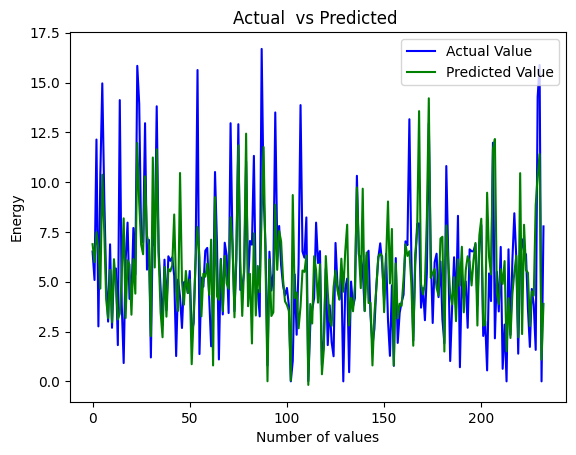

In [87]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_prediction, color='green', label='Predicted Value')
plt.title('Actual  vs Predicted ')
plt.xlabel('Number of values')
plt.ylabel('Energy')
plt.legend()
plt.show()

In [88]:
#Training Scores
training_data_prediction = xb_model.predict(X_train)

In [89]:
mean_absolute_error(Y_train, training_data_prediction)

0.2688547550091194

In [90]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

0.39074727105638857

In [91]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9871881679780262


In [92]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score: ", smape_score)


SMAPE score:  9.281609999467914


In [93]:
#Test Scores
mean_absolute_error(Y_test, test_prediction)

1.8024891045699176

In [94]:
rms = sqrt(mean_squared_error(Y_test, test_prediction))

In [95]:
print(rms)

2.702072912801902


In [96]:
# R squared error
error_score = metrics.r2_score(Y_test, test_prediction)
print("R squared error : ", error_score)

R squared error :  0.34024802497630735


In [97]:
smape_score = smape(Y_test, test_prediction)
print("SMAPE score: ", smape_score)

SMAPE score:  38.8774994508714


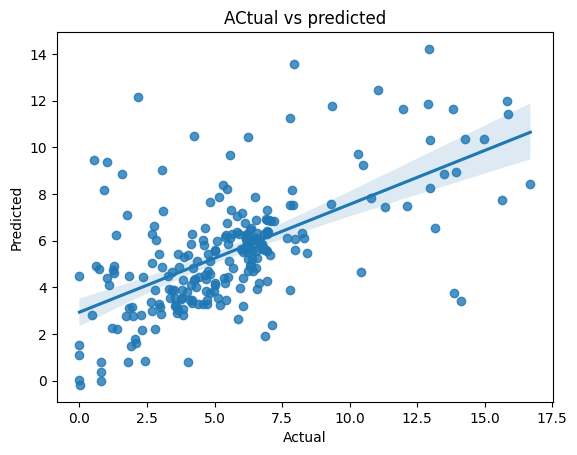

In [98]:
#Visualising
sns.regplot(x=Y_test, y=test_prediction)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#ANN 

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [100]:
# layers
model=Sequential()
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
#model.add(Dense(units = 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [101]:
# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')


In [102]:
# Train the model on the training dataset
model.fit(X_train, Y_train, epochs=1000, batch_size=64, verbose=0)

In [103]:
# Use the trained model to make predictions on the test dataset
Y_pred = model.predict(X_test)


8/8 [==============================] - 0s 2ms/step


In [104]:
print(Y_pred)

[[ 4.9578476]
 [ 6.5596714]
 [ 6.9729   ]
 [ 6.6450763]
 [ 5.50194  ]
 [10.490314 ]
 [ 6.056695 ]
 [ 5.2638874]
 [ 6.19478  ]
 [ 3.9053874]
 [ 2.9229307]
 [ 6.6228957]
 [ 5.2703404]
 [ 5.402757 ]
 [ 8.477984 ]
 [ 6.6627884]
 [ 6.1250353]
 [ 5.040589 ]
 [ 6.5282764]
 [ 5.874997 ]
 [ 5.931173 ]
 [ 5.9978013]
 [ 7.683121 ]
 [11.122314 ]
 [ 7.82078  ]
 [ 6.337656 ]
 [ 6.791956 ]
 [ 6.2594748]
 [ 7.4592447]
 [ 7.5060472]
 [ 1.4240927]
 [10.331382 ]
 [ 5.6711965]
 [ 9.69285  ]
 [ 6.4148264]
 [ 3.740446 ]
 [ 3.7416868]
 [ 6.1321244]
 [ 3.6628451]
 [ 5.5024014]
 [ 6.2402744]
 [ 6.6445937]
 [ 7.2339053]
 [ 5.90061  ]
 [ 5.562303 ]
 [11.030344 ]
 [ 5.0976663]
 [ 4.9571695]
 [ 5.451547 ]
 [ 3.797469 ]
 [ 6.137921 ]
 [ 4.5859547]
 [ 3.739376 ]
 [ 7.042697 ]
 [ 4.4364963]
 [ 6.284693 ]
 [ 4.063769 ]
 [ 4.8750434]
 [ 5.4818025]
 [ 6.4914412]
 [ 4.164971 ]
 [ 7.42158  ]
 [ 2.438754 ]
 [ 5.754315 ]
 [ 5.3289685]
 [ 5.0376678]
 [ 6.012713 ]
 [ 2.912979 ]
 [ 6.662806 ]
 [ 6.4074197]
 [ 3.4958792]
 [ 6.2

In [106]:
#Training Scores
training_data_prediction = model.predict(X_train)

30/30 [==============================] - 0s 2ms/step


In [107]:
mean_absolute_error(Y_train, training_data_prediction)

1.8442964882826962

In [108]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.8127780517802714

In [109]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.3361189719501745


In [115]:
def smape(actual, predicted):
    """
    Calculate SMAPE (Symmetric Mean Absolute Percentage Error) for actual and predicted values.
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    return np.mean((np.abs(actual - predicted) / (np.abs(actual) + np.abs(predicted))) * 2) * 100

In [116]:
smape_score = smape(Y_test, training_data_prediction )
print("SMAPE score:", smape_score)

SMAPE score: 55.16535991677949


In [117]:
#Test Scores
mean_absolute_error(Y_test, Y_pred)

1.8861700453778707

In [118]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [119]:
print(rms)

2.720404021084322


In [120]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.3312660258728112


In [121]:
smape_score = smape(Y_test, Y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 54.86283900619706


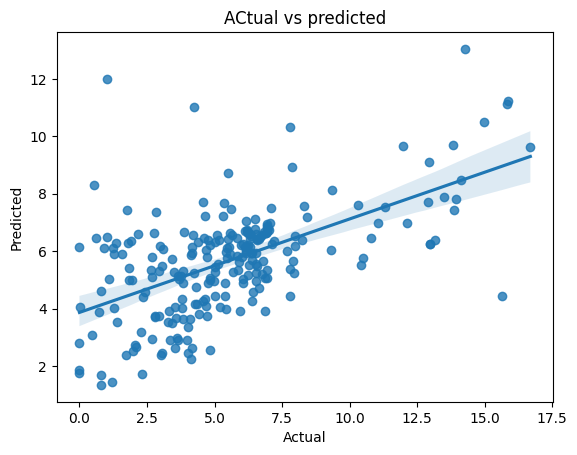

In [122]:
#Visualising
sns.regplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

#KNN

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [197]:
k = 5
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)

In [198]:
#Train Scores
training_data_prediction = knn.predict(X_train)

In [199]:
mean_absolute_error(Y_train, training_data_prediction)

1.7537078410311493

In [200]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.566532557862705

In [201]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.4472701941592703


In [202]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 33.732846562836286


In [203]:
#test Scores
mean_absolute_error(Y_test, knn_pred)

1.8855450643776823

In [204]:
sqrt(mean_squared_error(Y_test, knn_pred))

2.6787311454037757

In [205]:
# R squared error
error_score = metrics.r2_score(Y_test, knn_pred)
print("R squared error : ", error_score)

R squared error :  0.35159728341882956


In [206]:
smape_score = smape(Y_test, knn_pred)
print("SMAPE score:", smape_score)

SMAPE score: 39.41132856144189


In [207]:
from sklearn.ensemble import AdaBoostRegressor

In [280]:
k = 9
knn = KNeighborsRegressor(n_neighbors=k)
adaboost = AdaBoostRegressor(estimator=knn, n_estimators=50, learning_rate=0.1)
adaboost.fit(X_train, Y_train)
ada_pred = adaboost.predict(X_test)

In [281]:
#Train Scores
training_data_prediction = adaboost.predict(X_train)

In [282]:
mean_absolute_error(Y_train, training_data_prediction)

1.9213211600429645

In [283]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

2.604811967739268

In [284]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.43065949032259176


In [285]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 36.569609845317096


In [286]:
#Test Scores
mean_absolute_error(Y_test, ada_pred)

1.9895517405817833

In [287]:
sqrt(mean_squared_error(Y_test, ada_pred))

2.817214310475733

In [288]:
# R squared error
error_score = metrics.r2_score(Y_test, ada_pred)
print("R squared error : ", error_score)

R squared error :  0.2828230170873891


In [289]:
smape_score = smape(Y_test, ada_pred)
print("SMAPE score:", smape_score)

SMAPE score: 40.31467112782971


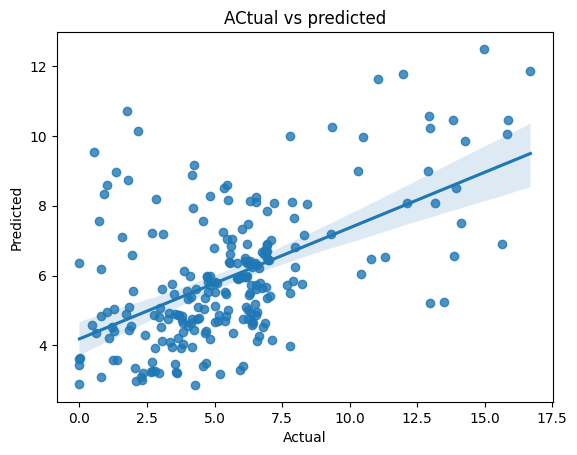

In [290]:
#Visualising
sns.regplot(x=Y_test, y=ada_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("ACtual vs predicted")
plt.show()

# Ensemble Learning

In [291]:

stack_regressor = StackingRegressor(estimators=[('rf', regressor), ('xgb', xb_model)])
stack_regressor.fit(X_train, Y_train)


StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

In [292]:
predictions = stack_regressor.predict(X_test)

In [293]:
print(predictions)

[ 5.66629536  5.81146468  7.30776327  6.26449829  5.35691255  9.88723875
  7.18565494  4.7631616   4.76475756  5.25167278  3.53453743  5.85973175
  4.74467219  4.24122184  6.29723695  5.32299678  9.54758447  4.22919149
  6.31534884  5.5200408   3.71122505  6.14708827  4.74268984  9.23655605
  8.73236628  6.14742409  6.66657955  9.77971101  7.09318721  6.87444342
  2.72290997  9.53643839  6.02225209  9.75184765  6.12619169  4.67197763
  3.58331244  6.09835618  3.80556259  5.80271303  5.82870776  5.93026932
  7.90246785  5.461737    4.14877605 10.19446964  4.65103692  4.61940529
  5.72769979  4.40888057  5.9511403   2.48515841  4.05170774  4.80836185
  6.95242464  5.37534834  4.32295192  5.44449934  5.39466564  6.01437706
  4.485547    6.7909323   2.52557493  7.44695827  5.34241347  4.13750976
  5.87094652  3.74670169  6.435095    4.68437102  4.46531185  6.93928376
  6.76658942  3.98889924  6.641313   10.98177828  5.85313707  5.22626359
  6.0770994  11.8483031   4.79752629  6.47777296  4

In [295]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [296]:
mean_absolute_error(Y_train, training_data_prediction)

0.8983809145004007

In [297]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.2763615654563378

In [298]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8633005508103067


In [299]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 21.200515113283167


In [300]:
#Test Scores
mean_absolute_error(Y_test, predictions)

1.6745139718479691

In [301]:
rms = sqrt(mean_squared_error(Y_test, predictions))

In [302]:
print(rms)

2.53373450034384


In [303]:
# R squared error
error_score = metrics.r2_score(Y_test, predictions)
print("R squared error : ", error_score)

R squared error :  0.4198920980444095


In [304]:
smape_score = smape(Y_test, predictions)
print("SMAPE score:", smape_score)

SMAPE score: 35.26649708144888


In [305]:
stack_regressor = StackingRegressor(estimators=[('rf', regressor),('svm',svr)])
stack_regressor.fit(X_train, Y_train)

StackingRegressor(estimators=[('rf', RandomForestRegressor()),
                              ('svm', SVR(C=10, gamma=0.1))])

In [306]:
pred=stack_regressor.predict(X_test)

In [307]:
print(pred)

[ 5.27471316  5.64691321  7.025747    6.12250421  5.87494997 10.78569997
  7.12126044  4.69824727  5.5969537   5.13987132  3.18290705  5.99766979
  4.6328595   3.8952823   6.6523843   5.33395923  9.81252738  4.2224769
  6.6193599   5.35733378  3.67469012  6.22946399  4.54277735  9.06331156
  9.68887291  6.01597275  6.56934747 10.00083512  7.32123412  7.16574474
  2.28544964  9.86173462  5.84073803 10.16086407  6.27102201  4.58750627
  3.50919026  6.26116665  3.7439421   5.25059819  5.91337628  6.21959086
  7.74974778  5.59606085  4.5720344   9.83364809  4.61903312  4.57119694
  5.54841209  4.0826234   5.92881824  2.66936307  3.69153191  4.89620349
  6.51629372  5.46157452  4.26292595  5.38451483  5.12959771  6.16756492
  4.4192393   7.2381773   2.68819524  7.23008602  5.37859553  4.43108361
  5.98264672  3.6344678   6.66481265  4.76076489  4.03255392  6.94903758
  6.88668604  3.53925219  6.6038224  10.04685905  6.44181654  5.03373137
  6.59913022 11.40933125  4.84228609  5.94365673  4.

In [309]:
#Train Scores
training_data_prediction = stack_regressor.predict(X_train)

In [310]:
mean_absolute_error(Y_train, training_data_prediction)

1.0095428931808192

In [311]:
sqrt(mean_squared_error(Y_train, training_data_prediction))

1.4941921791863355

In [312]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8126592534705768


In [313]:
smape_score = smape(Y_train, training_data_prediction)
print("SMAPE score:", smape_score)

SMAPE score: 22.499094858754898


In [314]:
#Test Scores
mean_absolute_error(Y_test, pred)

1.6486962124555349

In [315]:
rms = sqrt(mean_squared_error(Y_test, pred))

In [316]:
print(rms)

2.527814622276532


In [317]:
# R squared error
error_score = metrics.r2_score(Y_test, pred)
print("R squared error : ", error_score)

R squared error :  0.4225996873428878


In [318]:
smape_score = smape(Y_test, pred)
print("SMAPE score:", smape_score)

SMAPE score: 34.68979286117983


In [264]:
voting_reg = VotingRegressor(estimators=[('rf', regressor), ('svm', svr)])
voting_reg.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('svm', SVR(C=10, gamma=0.1))])

In [265]:
Y_pred = voting_reg.predict(X_test)

In [266]:
print(Y_pred)

[ 5.47389112  5.56611292  6.59711653  6.46632705  5.52853523 11.83769095
  7.02769893  4.71712993  5.54306489  5.30975638  2.82729497  6.18583359
  4.42421349  3.7559596   7.18578566  5.2974227   8.85865385  4.13440253
  6.80664482  5.34835045  4.26712459  6.41432723  4.77905909 10.02412527
 10.80861903  6.48010568  6.57235166 10.11673448  7.14710364  7.36834152
  1.54221676 10.02422126  5.30860441 10.37249888  6.4006287   4.53111103
  3.22151421  6.14949542  3.62685918  5.03654827  5.92523375  6.46991636
  7.84646555  5.45007289  4.92383822 10.01346453  4.40464541  4.4756791
  5.38599389  3.90916042  5.98880375  2.5025461   3.5547012   5.24538617
  6.27537948  5.57202062  4.14110828  5.26634438  5.2259988   6.21956881
  4.38362378  8.19534804  2.37829184  6.60738495  5.03482386  4.67299485
  6.03315707  3.56017556  6.67759999  5.35232751  3.90956552  6.52926666
  7.01673367  3.06571386  6.59223974  9.63397234  6.47094338  4.98263827
  6.90963116 10.67234147  5.28769875  5.79046577  4.

In [267]:
mean_absolute_error(Y_test, Y_pred)

1.6039551762008646

In [268]:
rms = sqrt(mean_squared_error(Y_test, Y_pred))

In [269]:
print(rms)

2.4775959276945176


In [270]:
# R squared error
error_score = metrics.r2_score(Y_test, Y_pred)
print("R squared error : ", error_score)

R squared error :  0.4453135865938659


In [271]:
smape_score = smape(Y_test, y_pred)
print("SMAPE score:", smape_score)

SMAPE score: 37.230506690275384


In [272]:
residuals = Y_test - test_data_prediction
n = len(X_test)
p = 1  # Assuming only one predictor variable
SSE = np.sum(residuals ** 2)
SE = np.sqrt(SSE / (n - p - 1))
print(SE)

2.570312764450966


In [273]:
vote_regressor = VotingRegressor(estimators=[('rf', regressor), ('xgb',xb_model),('svm',svr)])
vote_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...)),
                            ('svm', SVR(C=10, gamma=0.1))])

In [274]:
predict = vote_regressor.predict(X_test)

In [275]:
print(predict)

[ 5.82416801  5.7034711   6.78835307  6.50831453  5.276415   11.32192544
  7.2489702   4.52708446  4.82360374  5.33194957  2.851292    6.18988407
  4.59466042  3.50603102  6.10399679  5.39095034  8.96256792  3.73667505
  6.51816262  5.50300007  3.83726114  6.28469612  4.71646558 10.41118292
 10.33161981  6.39557779  6.46927431 10.36188347  7.20457991  7.22677317
  1.76826751 10.50948213  5.36831395 10.98282901  6.36298155  4.21280793
  3.08509893  6.052481    3.49638591  5.25524433  5.75675611  6.27437053
  7.78251945  5.1886135   4.39156619 10.06727704  4.58330794  4.2024169
  5.30107452  4.10141589  5.64611108  1.9780923   3.38096415  5.52045024
  6.50863098  5.77614886  3.70867179  5.34056792  5.00206441  6.11661304
  4.41363232  8.02707618  1.70003628  7.25844024  4.81525788  4.65137824
  6.04154169  3.55837209  6.56951839  5.12644959  4.35031459  7.17689991
  6.96733217  3.10808803  6.61753536 10.36309436  6.43663293  4.34351937
  6.72380197 11.29842206  4.84721662  5.4032955   3.

In [276]:
mean_absolute_error(Y_test, predict)

1.6264304176469278

In [277]:
rms = sqrt(mean_squared_error(Y_test, predict))

In [278]:
print(rms)

2.513066882140082


In [279]:
# R squared error
error_score = metrics.r2_score(Y_test,predict)
print("R squared error : ", error_score)

R squared error :  0.429317355343278


In [280]:
smape_score = smape(Y_test,predict)
print("SMAPE score:", smape_score)

SMAPE score: 34.17185749750793


In [281]:
residuals = Y_test - predict
n = len(X_test)
p = 1  # Assuming only one predictor variable
SSE = np.sum(residuals ** 2)
SE = np.sqrt(SSE / (n - p - 1))
print(SE)

2.5239225131555147
